In [1]:
# Dependencies

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

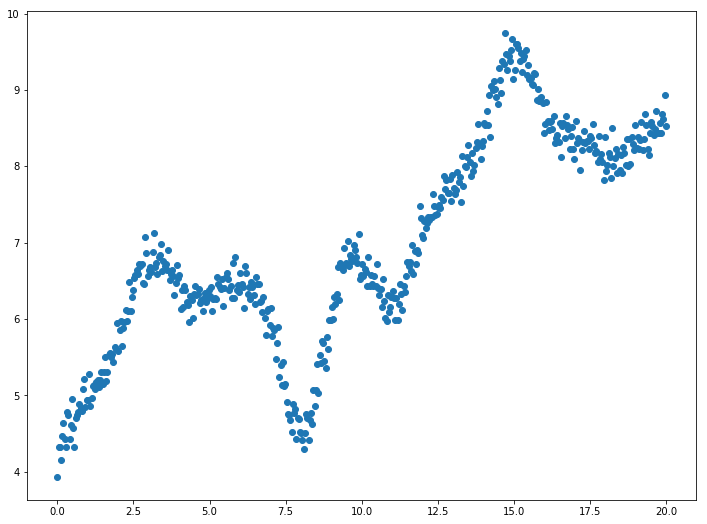

In [2]:
# Simulate Data

N = 500

x = np.linspace(0,20,N)
y = 3.92761 + 1.05763*np.sqrt(x) + np.exp(-(x - 3.009)**2) - 2.40932*np.exp(-(x - 8.03421)**2) - 1.253198*np.exp(-(x - 11)**2) + 1.5*np.exp(-(x - 15)**2) - 0.3245*np.exp(-(x - 18.4995)**2) + np.random.randn(N)*0.15

plt.figure(figsize = (12,9))
plt.scatter(x, y)

In [3]:
# Functions

def OLS(y, y_hat):
    return (y - y_hat).dot(y - y_hat)

def R2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

In [4]:
def d_squared(u,v):
    return (u-v).dot(u-v)

def distortion(X,M,R):
    dist = 0
    for i in range(len(X)):
        for k in range(len(M)):
            dist+= R [i,k]*d_squared(X[i],M[k])
    return dist

def k_mean (X,K,beta = 1.0, max_iters = 30, threshold = 1e-7):
    N,D = X.shape
    R = np.zeros((N,K))
    M = X[np.random.permutation(N), : ] [:K]
    
    J = []
    
    for t in range(max_iters):
        for i in range (N):
            for k in range (K):
                R[i,k] = np.exp(-beta* d_squared(X[i],M [k]))/sum(np.exp(-beta*d_squared(X[i],M[j])) for j in range(K))
                    
        for k in range(K):
            M[k] = R[:,k].dot(X)/R[:,k].sum()
            
        J.append(distortion(X,M,R))
        
        if t>0:
            if np.abs(J[t] - J[t-1])< threshold:
                break
                
    return M,R,J

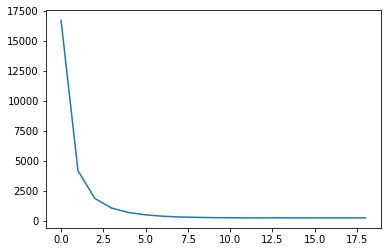

In [5]:
J = []
x = x.reshape(N,1)
    
for k in range(1,20):
    J_train = k_mean(x, k)[-1]
    J.append(J_train[-1])
    
plt.figure()
plt.plot(J)
  

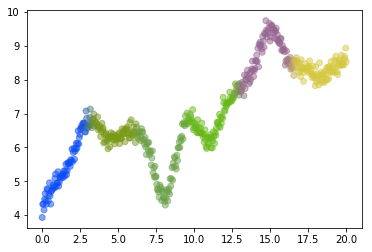

In [6]:
K = 6

M,R,J = k_mean(x,K)
     

R_colors = np.random.rand(K,3)
colors = R.dot(R_colors)
  
plt.figure()
plt.scatter(x, y, c = colors, alpha = 0.5)
    

In [7]:
# Data Prep

PHI = np.ones((N,1))

for i in range(K):
    PHI = np.column_stack((PHI, np.exp(-(x-np.mean(x[int(i*(1/K)*x.shape[0]):int((i+1)*(1/K) * x.shape[0]),:]))**2)))
    
P = PHI.shape[1]

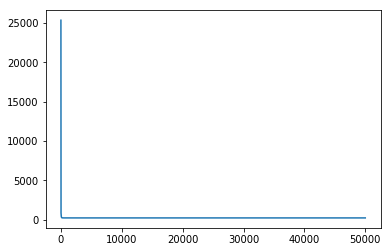

In [8]:
# Fit the Model (Gradient Descent)

w = np.random.randn(P) / np.sqrt(P)

J = []
eta = 5e-4
epochs = int(5e4)

for i in range(epochs):
    y_hat = PHI.dot(w)
    J.append(OLS(y, y_hat))
    w -= eta*PHI.T.dot(y_hat - y)
    
plt.plot(J)

R-squared: 0.7520857510315957


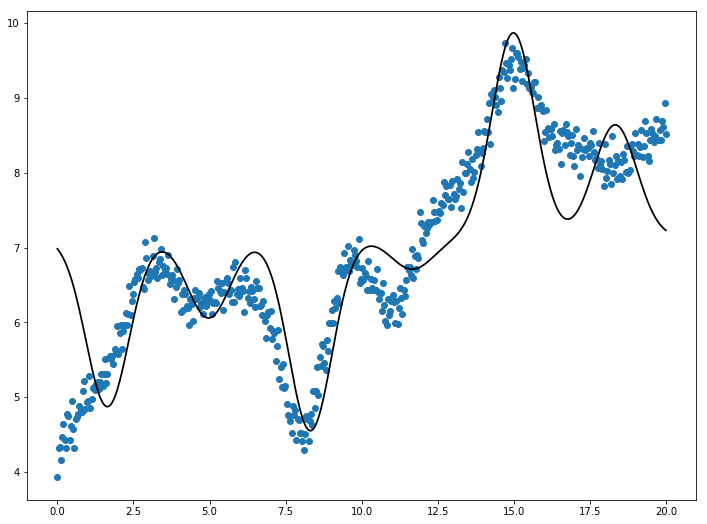

In [9]:
plt.figure(figsize = (12,9))
plt.scatter(x, y)
plt.plot(x, y_hat, color = "#000000", linewidth = 1.75)

print("R-squared: {}".format(R2(y, y_hat)))